
# Assignments #2 Supervised Learning  

In [23]:
# ---- (Run this first) ----
# import libraries
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score
#rom sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import Perceptron, LinearRegression
#from sklearn import datasets
#from sklearn.neighbors import NearestNeighbors

# letting plots appear inline
%matplotlib inline

print("All Done!")


ModuleNotFoundError: No module named 'matplotlib'


## Task 1 Theory questions

Answer **in text** below each question. (1-3 lines per answer)

#### 1. What is **supervised learning**? 

* Supervised learning uses a dataset with a `target`-column.
* A dataset with a `target`-column is considered "labeled" data.
* The `target`-column is the expected output.
* The other columns are called `features`.
* Given the `features` as input, the model is expected to produce the `target` as output.

#### 2. Define **classification**. Give one example.

* Classification is the method of grouping together data into distinct groups.
* An example of classification is to group players in a role-playing game like: 
    - "How often do they login?" Options: ["Daily", "Weekly", "Monthly"].
    - "Did they spend money?" Options: ["Yes", "No"] (binary classification)

#### 3. Define **regression**. Give one example.

* Regression is the method of approximating the function which gives the best fit to given data.
* An example of regression is using a linear function v = ax + b to approximate the relationship between input voltage and output temperature in a thermometer.

#### 4. Compare the **difference** between classification and regression?

* A classification-function gives categorical output. Example: ["Male", "Female"], ["Yes", "No"], etc.
* A regression-function gives a numerical output (continuous/floating point or discrete/integer value) over some kind of range. Examples: age in [0-99], temperature in [0, 273], change in [0, 1.0].

#### 5. What is a **confusion matrix** used for and how does it help evaluate the performance of a classification model?

The confusion matrix shows clearly where the model is correct or where it misclassifies. A perfect model gets a full score, only with values in the diagonal cells and the rest of cells have zero-values. Where the model makes mistakes will be counted in each cell.

<div align="center"><img src="./images/confusion-matrix.png" width=300></div>

<p align="center"><i>Figure: Confusion matrix shows model predicted wrongly `versicolor` 2 times, when it should have predicted the target: `virginica`.</i></p>

#### 6. Why do we **preprocess** data before training? Name **two** techniques.

* Binarization - converts binary values to 0 or 1
* Mean removal / subtraction - shifts the data by subtracting the mean, and the mean now becomes 0.
* Scaling - Adjusts the data to a specific range, for example normalization to the range [0, 1.0].


## Task 2 Preprocessing & Label Encoding

In this task, you are going to practice: scaling, normalization, and label encoding.

Here are the sub-tasks:

0. Create a small numeric dataset (already provided).
1. Apply **StandardScaler** and **MinMaxScaler**. Compare.
2. Apply **Normalizer**. Compare.
3. Encode simple text labels to numbers with **LabelEncoder**.
4. Answer two questions. 

(HINT: Print small tables. Plot simple histograms to see changes.)


In [ ]:
import numpy as np
from pandas import DataFrame

# --- Task 2.0 Use the provided small dataset below for the following tasks:
X = np.array([[1, 10],
              [2, 20],
              [3, 30],
              [4, 40],
              [5, 50]], dtype=float)

data = DataFrame(X, columns=["feat1","feat2"])
print("Original data:")
display(data)


Original data:


,feat1,feat2
0,1.0,10.0
1,2.0,20.0
2,3.0,30.0
3,4.0,40.0
4,5.0,50.0


#### Task 2.1 StandardScaler


For every feature (column) the `StandardScaler` computes:

$$
z = \frac{x - \mu}{\sigma}
$$

where 𝜇 is the average and 𝜎 is the standard deviation.

In [ ]:

from sklearn.preprocessing import StandardScaler

standard = DataFrame(data)
standard = StandardScaler().fit_transform(data)

standard

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

#### Task 2.1 MinMaxScaler

For every feature (column) the `MinMaxScaler` computes:
$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

where *x_min* is the lowest value in and column and *x_max* is the highest.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = DataFrame(data)
minmax = MinMaxScaler().fit_transform(data)

minmax

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])


#### Task 2.2: Normalizer (row-wise to unit norm):

For each row **Normalizer** divides the row by the norm/magnitude:

$$
\mathbf{x}' = \frac{\mathbf{x}}{\|\mathbf{x}\|}
$$

where the norm/magnitude is given by:

$$
\|\mathbf{x}\| = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}
$$

In [ ]:
from sklearn.preprocessing import Normalizer

norm = DataFrame(data)
norm = Normalizer().fit_transform(data)

norm

array([[0.09950372, 0.99503719],
       [0.09950372, 0.99503719],
       [0.09950372, 0.99503719],
       [0.09950372, 0.99503719],
       [0.09950372, 0.99503719]])


#### Task 2.3: Label Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder

#     (tips: want to know the encoding mapping?
#      Try "list(enc.classes_)", where enc is the LabelEncoder object)

LabelEncoder().fit(data["feat1"]).classes_,\
LabelEncoder().fit(data["feat2"]).classes_

(array([1., 2., 3., 4., 5.]), array([10., 20., 30., 40., 50.]))


##### Task 2.4: Questions (answer **in text** as commments below each question)

**Q1: When would you prefer StandardScaler vs MinMaxScaler vs Normalizer? Why? Explain briefly.**

* StandardScaler - Scales by column, to a normal distribution. Works well when working with statistical data.
* MinMaxScaler - Scales by column, to the range [0, 1], while still possible to compare rows.
* Normalizer - Scales by row. Now all iformation about scale between rows is lost. Only direction of each row vector can be compared. Useful for some situations where scale is irrelevant and only direction matters.

**Q2: Create a small histogram for one feature before and after scaling. Any differences you notice?**

For *standard*- and *minmax*-normalization the main difference is that before the normalization the different features were in different buckes in the histogram. After normalization both feat1 and feat2 are evenly distributed in all histogram-buckets. *norm*-normalization makes sure all values within a single feature/column land in the same histogram-bucket.

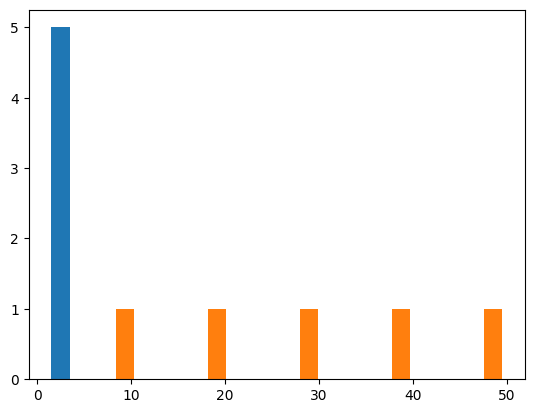

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data)
plt.show()

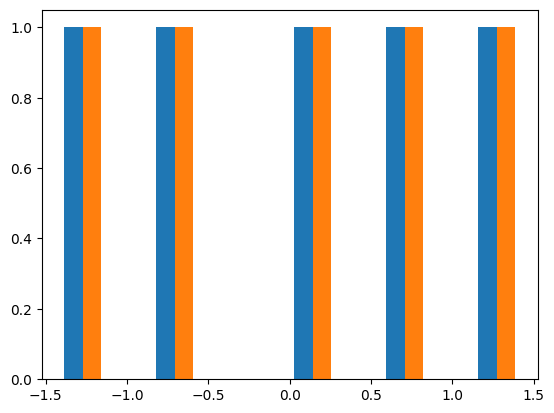

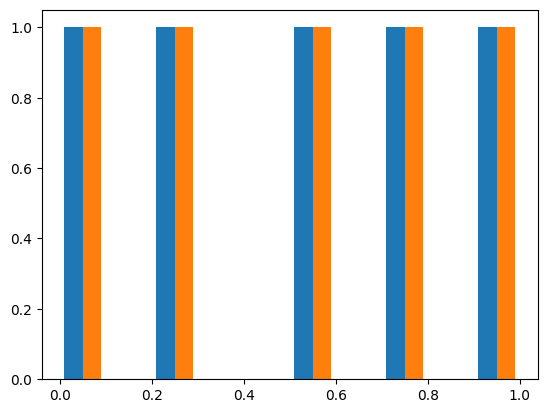

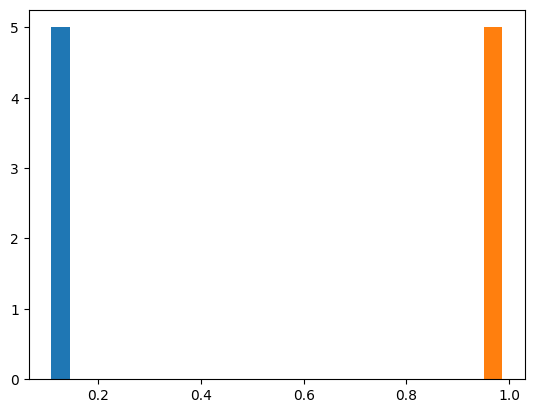

In [ ]:
plt.hist(standard)
plt.show()
plt.hist(minmax)
plt.show()
plt.hist(norm)
plt.show()


## Task 3 Perceptron on a simple problem

We use **Perceptron** for a binary task (a "OR gate" data).

**Steps:**
0. Build small binary dataset `X_or`, `y_or`.
1. Train `Perceptron()` with default params.
2. Print predictions for all inputs.
3. Try different `max_iter` and `eta0` (learning rate).
4. Answer one question.

(Tip: Keep it simple. Focus on input → output mapping.)


In [ ]:
from numpy import array

# --- Task 3.0: Data (OR problem: output is 1 except when both inputs are 0)
X_or = array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y_or = array([0,1,1,1])


# --- Task 3.1: Train Perceptron 
#     (Hint: use Preceptron() from sklearn.linear_model; then fit(X_or, y_or);
#            use default params first, then try changing max_iter and eta0)
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=10, eta0=0.5, random_state=42)
perceptron.fit(X_or, y_or)

# --- Task 3.2: Predict
#      (Hint: use clf_perc.predict([x]) for each x in X_or, 
#             where clf_perc is the trained model, replce clf_perc with your model name)
perceptron.predict(X_or)

array([0, 1, 1, 1])

#### Task 3.3: Change max_iter and/or eta0 and re-train. Do results change?

Only during the first iteration - with `max_iter=1` a difference in result is observed. Else no change from the base `max_iter=10` and `eta0=0.5`.


In [24]:
for i in range(1, 11):
    print(f"--- max_iter={i}: -------------------------------------------------------")
    for j in range(1, 11):
        perceptron = Perceptron(max_iter=i, eta0=0.1*j, random_state=42)
        perceptron.fit(X_or, y_or)
        print(f"perceptron.predict(X_or) with max_iter={i}, eta0={0.1*j:.1f}: ", perceptron.predict(X_or))

--- max_iter=1: -------------------------------------------------------
perceptron.predict(X_or) with max_iter=1, eta0=0.1:  [1 1 1 1]
perceptron.predict(X_or) with max_iter=1, eta0=0.2:  [1 1 1 1]
perceptron.predict(X_or) with max_iter=1, eta0=0.3:  [1 1 1 1]
perceptron.predict(X_or) with max_iter=1, eta0=0.4:  [1 1 1 1]
perceptron.predict(X_or) with max_iter=1, eta0=0.5:  [1 1 1 1]
perceptron.predict(X_or) with max_iter=1, eta0=0.6:  [1 1 1 1]
perceptron.predict(X_or) with max_iter=1, eta0=0.7:  [1 1 1 1]
perceptron.predict(X_or) with max_iter=1, eta0=0.8:  [1 1 1 1]
perceptron.predict(X_or) with max_iter=1, eta0=0.9:  [1 1 1 1]
perceptron.predict(X_or) with max_iter=1, eta0=1.0:  [1 1 1 1]
--- max_iter=2: -------------------------------------------------------
perceptron.predict(X_or) with max_iter=2, eta0=0.1:  [0 1 1 1]
perceptron.predict(X_or) with max_iter=2, eta0=0.2:  [0 1 1 1]
perceptron.predict(X_or) with max_iter=2, eta0=0.3:  [0 1 1 1]
perceptron.predict(X_or) with max_ite

/Users/jonas/git/github.com/Arxcis/VE3451-KI-og-maskinl-ring/.venv/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jonas/git/github.com/Arxcis/VE3451-KI-og-maskinl-ring/.venv/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jonas/git/github.com/Arxcis/VE3451-KI-og-maskinl-ring/.venv/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jonas/git/github.com/Arxcis/VE3451-KI-og-maskinl-ring/.venv/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradien


## Task 4 Linear Regression (Single Variable)

We fit a **Linear Regression** model to a 1D dataset.

**Steps:**
1. Generate synthetic data: `y = 2.5 * x + noise`.
2. Fit `LinearRegression()`.
3. Report **MAE**, **MSE**, **R²**.
4. Plot data points and the regression line.
5. Answer questions 

In [ ]:
# --- Task 4.1: Generate synthetic single variable data: y = 2.5 * x + noise, noise ~ N(0,1), X in [0,10], 40 samples
#     (Hint: use linspace to generate x values; use np.random.normal to generate noise)


# --- Task 4.2: Fit model 
#     (Hint: use LinearRegression() from sklearn.linear_model; then fit())


# --- Task 4.3: Metrics (MAE, MSE, R²)


# --- Task 4.4: Plot data points and the regression line


# --- Task 4.5: Questions ---
# Q1: Change the slope in data generation to 3.0 and re-run. What happens to R^2? 
# # -> (your answer):
# Q2: Try adding larger noise (e.g., std=3.0). How do MAE/MSE change?
#  -> (your answer):



## Task 5 Using kNN for outlier detection

We use Iris data (only two features: sepal length & sepal width).  
We mark points with **large average distance** to their **k** nearest neighbors.

**Steps:**
1. Load Iris. Keep only columns: sepal length, sepal width.
2. Fit `NearestNeighbors(n_neighbors=k)`.
3. Compute the mean distance for each point to its neighbors.
4. Choose a threshold (e.g., top 10% largest distances) → mark outliers.
5. Plot scatter; mark outliers differently.

Start with `k = 5`.


In [ ]:
# --- Task 5.1: Load Iris data (sepal length and width)
#     (Hint: use datasets.load_iris() from sklearn; then use data[:, :2] to get first two features)


# --- Task 5.2: Fit NearestNeighbors
#     (Hint: use NearestNeighbors(n_neighbors=k) from sklearn.neighbors)


# --- Task 5.3: Mean distance to neighbors
#     (Hint: use nn.kneighbors(X_iris) to get distances and indices of neighbors, then compute mean distance)


# --- Task 5.4: Threshold= top 10%, and find outliers
#     (Hint: use np.percentile to get the threshold)


# --- Task 5.5: Plot, mark outliers differently, e.g., with 'x'/'*'/'^' marker, different color, etc.


# --- Questions ---
# 1: Change k to 2 and 10. How does the outlier set change?
#  -> (your answer):
# 2: Try a stricter threshold (e.g., top 5%). What happens?
#  -> (your answer):



## (Final task) Task 6 End-to-End Classification Pipeline

We build a complete supervised learning pipeline using **Digits** data:
- **Aim:** Classify hand-written digits ("0"–"9").
- **Model:** `MLPClassifier`, a simple neural network.
- **Outputs:** Accuracy and **confusion matrix**.

**Steps:**
1. Load data: `datasets.load_digits()`.
2. Train/validation split: 80% / 20%.
3. Scale features with `StandardScaler()`.
4. Train `MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=0)`.
5. Evaluate on validation set. Print accuracy.
6. Show the **confusion matrix** with `ConfusionMatrixDisplay`.
7. Write 3–5 lines: What mistakes are most common? Why?

**Tips:**
- If training warns about convergence, **increase** `max_iter`.
- Use a **small network** to keep runtime short.


In [ ]:

# --- Task 6.1: Load digits
#     (Hint: use datasets.load_digits() from sklearn)


# --- Task 6.2: Split data into train and validation 
#     (Hint: use train_test_split from sklearn.model_selection)


# --- Task 6.3: Scaling (NOTE: fit on train only!!)



# --- Task 6.4: Train a MLPClassifier
#     (Hint: use MLPClassifier from sklearn.neural_network)


# --- Task 6.5: Evaluate.  Print accuracy.
#    (Hint: use mlp.score(), where mlp is your trained model)


# --- Task 6.6: Confusion matrix
#    (Hint: use confusion_matrix and ConfusionMatrixDisplay from sklearn.metrics)


# --- Task 6.7: Questions ---
# 1: In 3–5 lines: describe the main error types you see and a possible reason (e.g., similar shapes).
#  -> (your answer):


## (Optional) Any refection or additional notes you want to add here?